### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import wordcloud
import nltk
import warnings
warnings.filterwarnings('ignore')

### Reading  and Cleaning the Dataset

In [2]:
df = pd.read_csv('ml_dataset.csv')
df.head()

,Unnamed: 0,Job Title,Company,Location,Salary
0,0,Machine Learning Engineer,DeepEdge,Hyderābād,₹4L - ₹8L (Glassdoor Est.)
1,1,Machine Learning Engineer,Mercedes-Benz Research and Development India P...,Bangalore,₹6L - ₹8L (Glassdoor Est.)
2,2,Machine Learning Engineer,CogniveAI Innovations,Chennai,NaN
3,3,Data Engineer,Maersk,Bangalore,₹6L - ₹8L (Glassdoor Est.)
4,4,Machine Learning Engineer,FLIPPED.AI,Bangalore,₹7L - ₹8L (Employer Est.)


### Removing the Duplicates and Unnecessary Columns

In [3]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.dropna(inplace=True)
df.drop('Unnamed: 0',inplace=True,axis=1)
df = df[df.Location != 'India']

In [4]:
df

,Job Title,Company,Location,Salary
0,Machine Learning Engineer,DeepEdge,Hyderābād,₹4L - ₹8L (Glassdoor Est.)
1,Machine Learning Engineer,Mercedes-Benz Research and Development India P...,Bangalore,₹6L - ₹8L (Glassdoor Est.)
3,Data Engineer,Maersk,Bangalore,₹6L - ₹8L (Glassdoor Est.)
4,Machine Learning Engineer,FLIPPED.AI,Bangalore,₹7L - ₹8L (Employer Est.)
5,Computer Vision Research Engineer - Machine Le...,Mercedes-Benz Research and Development India P...,Bangalore,₹8L - ₹11L (Glassdoor Est.)
...,...,...,...,...
895,Associate - Machine Learning Engineer,EY,Bangalore,₹3L - ₹5L (Glassdoor Est.)
896,Machine Learning Engineer-NLP (Remote),Leena AI,Gurgaon,₹9L - ₹11L (Glassdoor Est.)
897,Machine Learning Engineer,Diageo,Bangalore,₹3L - ₹4L (Glassdoor Est.)
898,Machine Learning Engineer,Datamate Infosolutions Pvt. Ltd,Cochin,₹4L - ₹8L (Glassdoor Est.)


### Cleaning the Salary Column

In [5]:
new_salary = df['Salary'].apply(lambda x: x.split('(')[0])
salary = new_salary.apply(lambda x: x.replace('₹','').replace('L','').replace('Cr','100').replace('T',''))


In [6]:
min_salary = salary.apply(lambda x: int(x.split('-')[0]))


In [7]:
max_salary = salary.apply(lambda x: int(x.split('-')[-1]))

In [8]:
df['avg_salary'] = (max_salary+min_salary)/2

In [9]:
df.drop('Salary',axis=1,inplace=True)
df.drop_duplicates(inplace=True, ignore_index=True)

In [10]:
df[df['avg_salary'] == df['avg_salary'].max()]

,Job Title,Company,Location,avg_salary
43,Machine Learning Engineer,Acme Hr Consulting,Gurgaon,97.0


### Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Job Title   45 non-null     object 
 1   Company     45 non-null     object 
 2   Location    45 non-null     object 
 3   avg_salary  45 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.5+ KB


In [12]:
df.describe()

,avg_salary
count,45.000000
mean,9.433333
std,14.750424
min,2.500000
25%,4.000000
50%,6.000000
75%,7.000000
max,97.000000


In [13]:
df.columns

Index(['Job Title', 'Company', 'Location', 'avg_salary'], dtype='object')

<AxesSubplot:>

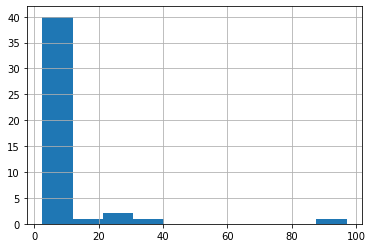

In [14]:
df.avg_salary.hist()

<AxesSubplot:>

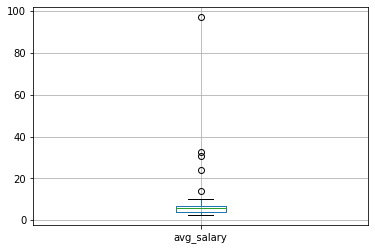

In [15]:
df.boxplot(column=['avg_salary'])

## Catorical Plots

In [16]:
s = df[list(df.columns[:-1])]

Graph for Job Title: total = 10


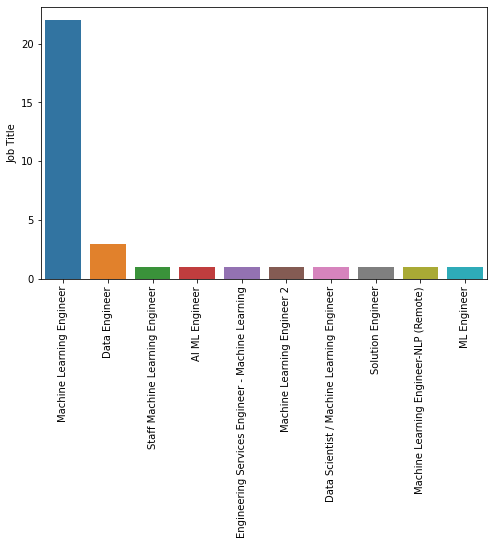

Graph for Company: total = 10


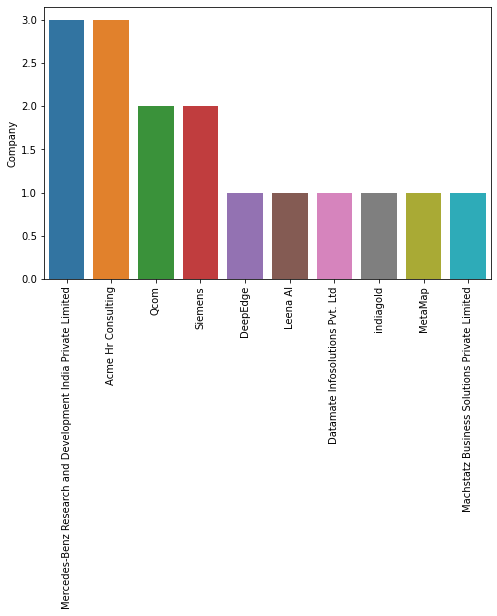

Graph for Location: total = 10


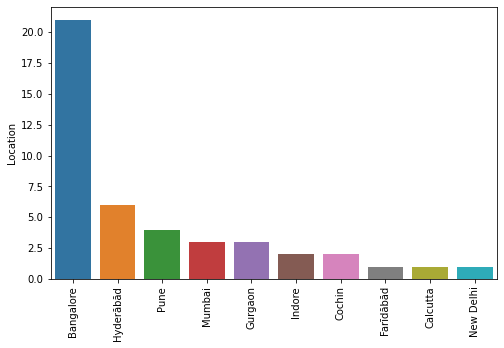

In [17]:
import seaborn as sns
for i in s:
    cat_num = s[i].value_counts()[:10]
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    f,ax = plt.subplots(1,figsize=(8,5))
    sns.barplot(x=cat_num.index, y=cat_num,ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()

### We can draw a conclusion from above graphs 
#### 1. Mercedes-Benz,Acme Hr and Qcom have more number of openings.
#### 2. The most number of jobs are available in Banglore followed by Hyderabad and Pune

### Lets's see the pivot table for different features

In [18]:
df.columns

Index(['Job Title', 'Company', 'Location', 'avg_salary'], dtype='object')

In [19]:
df[:10]

,Job Title,Company,Location,avg_salary
0,Machine Learning Engineer,DeepEdge,Hyderābād,6.0
1,Machine Learning Engineer,Mercedes-Benz Research and Development India P...,Bangalore,7.0
2,Data Engineer,Maersk,Bangalore,7.0
3,Machine Learning Engineer,FLIPPED.AI,Bangalore,7.5
4,Computer Vision Research Engineer - Machine Le...,Mercedes-Benz Research and Development India P...,Bangalore,9.5
5,Machine Learning - Staff Engineer,Qcom,Hyderābād,4.0
6,Machine learning engineer,3loq,Hyderābād,6.0
7,AI and Machine Learning (ML) Performance Engineer,Hewlett Packard Enterprise,Bangalore,5.5
8,Jr Data Scientist,Pluto7,Bangalore,8.5
9,Jr. ML Engineer,Openspace Services,Mumbai,4.0


In [20]:
pd.set_option('display.max_rows',None)

### Top 5 Job Title with Highest salary

In [21]:
pd.pivot_table(df,index='Job Title', values = 'avg_salary',aggfunc=np.mean).sort_values(by='avg_salary',ascending=False).head(5)

,avg_salary
Job Title,
Machine Learning Engineer 2,30.500000
Deep Learning Deployment Engineer (Cloud),24.000000
– Machine Learning Engineer,14.000000
Machine Learning Engineer,10.613636
Machine Learning Engineer-NLP (Remote),10.000000


In [22]:
df['avg_salary'].mean()

9.433333333333334

In [23]:
# we can do same analysis using groupby
# df.groupby('Job Title')['avg_salary'].max()


In [24]:
df[df['avg_salary'] == df['avg_salary'].max() ]

,Job Title,Company,Location,avg_salary
43,Machine Learning Engineer,Acme Hr Consulting,Gurgaon,97.0


In [25]:
# df.groupby('Job Title')[['avg_salary']].max().sort_values(by='avg_salary',ascending = False)

### Top 5 cities that offers highest salary

In [26]:
pd.pivot_table(df,index='Location', values='avg_salary').sort_values(by='avg_salary',ascending=False).head(5)

,avg_salary
Location,
Gurgaon,38.666667
Calcutta,14.000000
Bangalore,9.214286
Noida,6.500000
Farīdābād,6.000000


### Top 5 companies that offers highest salary 

In [27]:
pd.pivot_table(df,index='Company', values='avg_salary').sort_values(by='avg_salary',ascending=False).head(5)

,avg_salary
Company,
Acme Hr Consulting,36.333333
Multirecruit,32.500000
Adobe,30.500000
Conxai Technologies GmbH,24.000000
Sourcedesk Global,14.000000


## Word Cloud

In [28]:
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ansar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ansar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
words = " ".join(df['Job Title'])

def punctuation_stop(text):
    """ remove punctuation and stopwords"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

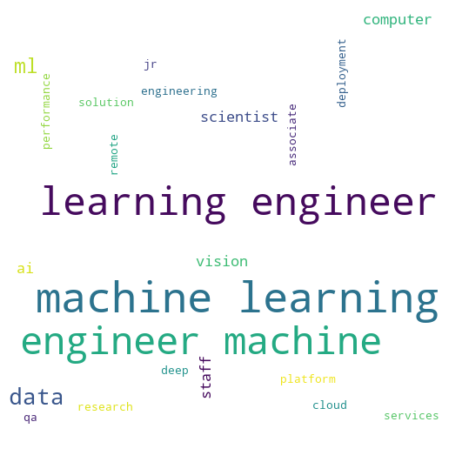

In [30]:
words_filtered = punctuation_stop(words) 
text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color='white',random_state=1, stopwords=STOPWORDS, max_words=3000, width=500, height=500)
wc.generate(text)

plt.figure(figsize=[8,8])
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

## Thank You!